# Basic classification: Classify images of clothing using Tensorflow

In [1]:
#Importing Libraries
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


### Loading the FASHION_MNIST data

In [3]:
data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

#Total 10 classes and each represented by an integer.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


### Scaling Images

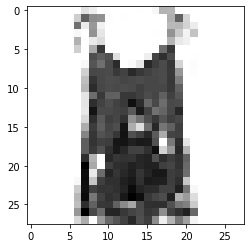

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941177 0.33333334
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.9882353
  0.972549   0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784315 0.95686275 0.9843137  0.94509804 0.9019608
  0.93333334 0.8666667  0.8039216  0.9019608  0.9411765  0.9019608
  0.9372549  0.9843137  0.9137255  0.64705884 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039217 0.984

In [4]:
#Scaling the values between 0-1 by dividing by 255(max val of pixels)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#Visualising an image
plt.imshow(X_train[67], cmap=plt.cm.binary)
plt.show()

#Checking how an images looks like in numpy array format after scaling
print(X_train[7])

### Creating Neural Network

In [5]:
#Initializing the model
model = keras.Sequential()

#Adding layers
model.add(keras.layers.Flatten(input_shape = (28, 28))) #input image size = 28X28. Hence the input_shape = (28,28)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation= 'softmax')) #Final output layer. Total 10 categories hence activation function = softmax
model.summary()

#Compiling the model and initializing the parameters
model.compile(optimizer= 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fitting the model and also evaluating against the Testing data.

model.fit(X_train, y_train, 
          epochs=30, 
          validation_data=(X_test,y_test), 
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 96us/sample - loss: 0.5358 - accuracy: 0.8099 - val_loss: 0.4451 - val_accuracy: 0.8381
Epoch 2/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3835 - accuracy: 0.8616 - val_loss: 0.4146 - val_accuracy: 0.8486
Epoch 3/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3442 - accuracy: 0.8751 - val_loss: 0.4102 - val_accuracy: 0.8568
Epoch 4/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3208 - accuracy: 0.8840 - val_loss: 0.3789 - val_accuracy: 0.8675
Epoch 5/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3039 - accuracy: 0.8900 - val_loss: 0.3922 - val_accuracy: 0.8622
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2898 - accuracy: 0.8938 - val_loss: 0.3914 - val_accuracy: 0.8662
Epoch 7/30
60000/60000 [==============================] 

### Evaluating the model

In [7]:
loss, acc = model.evaluate(X_test,y_test)
print('Tested Accuracy:', acc)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.4726 - accuracy: 0.8835
Tested Accuracy: 0.8835


### Predicting unseen clothes and visualizing few of them 

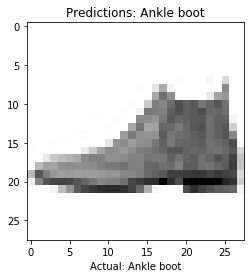

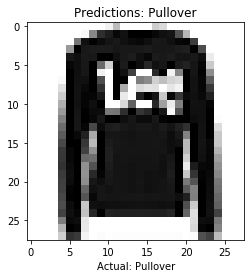

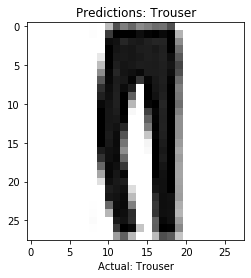

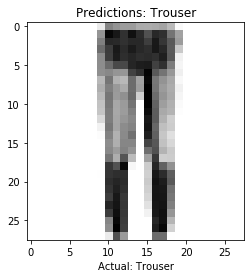

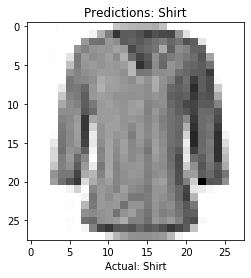

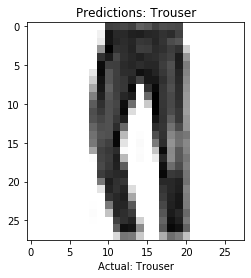

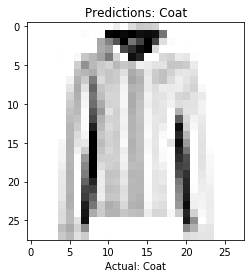

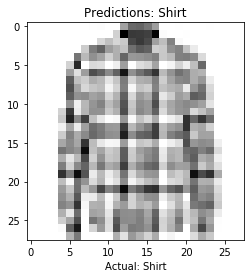

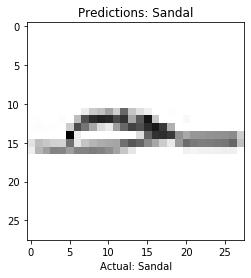

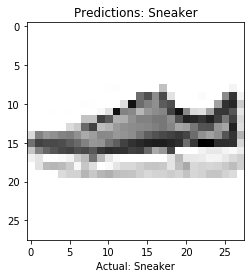

In [8]:
predictions = model.predict(X_test)
for i in range(10):
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.xlabel('Actual: '+ class_names[y_test[i]])
  plt.title('Predictions: '+class_names[np.argmax(predictions[i])])
  plt.show()